### Problem Statement
This project aims to classify news articles as real or fake based on their content. Specifically, we will use machine learning to build a model to predict whether a given news article is real or fake based on its text.

In [1]:
print("started")
!pip install pandas numpy matplotlib seaborn scikit-learn nltk xgboost

started


In [2]:
# Import necessary libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # This function splits your dataset into two parts: A training set to teach your model, A testing set to evaluate how well your model performs
from sklearn.feature_extraction.text import TfidfVectorizer # It converts text data into numbers, using a method called TF-IDF. Words that are important and unique to a document get higher scores
import nltk
from nltk.stem import WordNetLemmatizer # It helps group similar words together, so "run", "running", "runs" are treated as the same word.
from nltk.corpus import stopwords # Provides a list of common words in English that are usually not useful for text analysis.
from nltk.tokenize import word_tokenize # Splits sentences into individual words (called tokens).
import re
import string

In [3]:
df_real = pd.read_csv(r"C:\Users\shali\Desktop\true.csv")
df_fake = pd.read_csv(r"C:\Users\shali\Desktop\fake.csv")

In [4]:
df_real

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [5]:
df_fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [6]:
df_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [7]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


### Key Takeaways : 
1. The dataset sizes are relatively balanced but not exactly equal.
2. The subject column may help in additional feature extraction.
3. title and text will be our main focus for classification.
4. The date column is likely not useful for our task, but we will analyze it further if needed.

In [8]:
# Added a new column to label fake news as 0 and real news as 1.
df_real['flag'] = 1
df_fake['flag'] = 0

# Merging both tables
data = pd.concat([df_real , df_fake] , axis=0)

# Randomly sampling the data
data = data.sample(frac=1).reset_index(drop = True)

data

,title,text,subject,date,flag
0,LILY WHITE MERYL STREEP Explains Why They Don’...,There must be an equal number of victims as th...,left-news,"Feb 11, 2016",0
1,Donald Trump Just Used The World Trade Center...,It s become more than obvious that Donald Trum...,News,"April 24, 2017",0
2,Factbox: Women who have alleged inappropriate ...,(Reuters) - At least 12 women have accused U.S...,politicsNews,"October 28, 2016",1
3,"JOKE OF THE WEEK: A Marine, A Priest And A Fla...",HYSTERICAL!A US Marine enters the Catholic Chu...,politics,"Mar 5, 2016",0
4,"Trump on North Korea, Wall Street regulation, ...",NEW YORK - Presumptive Republican nominee Dona...,politicsNews,"May 17, 2016",1
...,...,...,...,...,...
44893,DIRTY POOL! FBI AND DOJ Just Affirmed They Spi...,How dirty is this? The powers-that-be at the i...,politics,"Nov 20, 2017",0
44894,Britain says Brexit talks ongoing after calls ...,LONDON (Reuters) - Britain said on Thursday th...,worldnews,"December 7, 2017",1
44895,MILITARY K-9 HANDLER’S Post About Vulgar Encou...,Hillary doesn t care about anyone but Hillary...,politics,"Aug 2, 2016",0
44896,California legislature sends $122.5 billion bu...,SAN FRANCISCO (Reuters) - The California legis...,politicsNews,"June 16, 2016",1


In [9]:
# We are only going to use only these 2 columns for training our model
# So we have merged the title and text together 

data['text'] = data['title'] + " " + data['text']
data = data[['text', 'flag']]

# View the cleaned DataFrame
data

,text,flag
0,LILY WHITE MERYL STREEP Explains Why They Don’...,0
1,Donald Trump Just Used The World Trade Center...,0
2,Factbox: Women who have alleged inappropriate ...,1
3,"JOKE OF THE WEEK: A Marine, A Priest And A Fla...",0
4,"Trump on North Korea, Wall Street regulation, ...",1
...,...,...
44893,DIRTY POOL! FBI AND DOJ Just Affirmed They Spi...,0
44894,Britain says Brexit talks ongoing after calls ...,1
44895,MILITARY K-9 HANDLER’S Post About Vulgar Encou...,0
44896,California legislature sends $122.5 billion bu...,1


In [10]:
# Data Preprocessing

# Step 1: Load the list of English stopwords from NLTK
# These are common words like "the", "is", "and", etc., that add little meaning
stop_words = set(stopwords.words('english'))

# Step 2: Define a function to clean the text
def clean_text(text):
    # Convert all characters to lowercase to ensure uniformity
    text = text.lower()

    # Remove all punctuation marks from the text
    text = "".join([ch for ch in text if ch not in string.punctuation])

    # Split the text into individual words
    words = text.split()

    # Remove stopwords from the list of words
    words = [word for word in words if word not in stop_words]

    # Join the cleaned words back into a single string
    return " ".join(words)

# Step 3: Apply the cleaning function to the first 1000 rows of the 'text' column
# and update those rows in the original DataFrame
data.loc[:999, "text"] = data["text"][:1000].apply(clean_text)

data

,text,flag
0,lily white meryl streep explains don’t need mi...,0
1,donald trump used world trade center collapsin...,0
2,factbox women alleged inappropriate conduct tr...,1
3,joke week marine priest flag burning hillary s...,0
4,trump north korea wall street regulation tech ...,1
...,...,...
44893,DIRTY POOL! FBI AND DOJ Just Affirmed They Spi...,0
44894,Britain says Brexit talks ongoing after calls ...,1
44895,MILITARY K-9 HANDLER’S Post About Vulgar Encou...,0
44896,California legislature sends $122.5 billion bu...,1


In [11]:
# TF-IDF Feature Extraction

# Step 1: Ensure the 'text' column contains strings
# (In case it contains lists of tokens, join them)
data["text"] = data["text"].apply(lambda x: " ".join(x) if isinstance(x, list) else x)

# Step 2: Initialize the TF-IDF Vectorizer
# Limit to top 5000 features for performance and memory efficiency
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Step 3: Fit the vectorizer on the text data and transform it to TF-IDF features
x_train_tfidf_matrix = tfidf_vectorizer.fit_transform(data["text"])

# Step 4: Convert the TF-IDF sparse matrix to a dense DataFrame
# Each column is a word, and each row is a document
x_train_tfidf_matrix = pd.DataFrame(
    x_train_tfidf_matrix.toarray(), 
    columns=tfidf_vectorizer.get_feature_names_out()
)

# Step 5: Display the first few rows to inspect
print(x_train_tfidf_matrix.head())

    00  000        10  100   11       12  120        13        14   15  ...  \
0  0.0  0.0  0.000000  0.0  0.0  0.00000  0.0  0.000000  0.000000  0.0  ...   
1  0.0  0.0  0.000000  0.0  0.0  0.00000  0.0  0.000000  0.000000  0.0  ...   
2  0.0  0.0  0.022215  0.0  0.0  0.12923  0.0  0.084908  0.057307  0.0  ...   
3  0.0  0.0  0.000000  0.0  0.0  0.00000  0.0  0.000000  0.000000  0.0  ...   
4  0.0  0.0  0.000000  0.0  0.0  0.00000  0.0  0.000000  0.000000  0.0  ...   

   youtu  youtube  zealand  zero  zika  zimbabwe  zone  zones  zor  zuma  
0    0.0      0.0      0.0   0.0   0.0       0.0   0.0    0.0  0.0   0.0  
1    0.0      0.0      0.0   0.0   0.0       0.0   0.0    0.0  0.0   0.0  
2    0.0      0.0      0.0   0.0   0.0       0.0   0.0    0.0  0.0   0.0  
3    0.0      0.0      0.0   0.0   0.0       0.0   0.0    0.0  0.0   0.0  
4    0.0      0.0      0.0   0.0   0.0       0.0   0.0    0.0  0.0   0.0  

[5 rows x 5000 columns]


In [12]:
# Split the dataset into training and testing sets
# test_size=0.2 → 20% of data will be used for testing, 80% for training
# random_state=42 → ensures reproducibility (same split every time you run)
x_train, x_test, y_train, y_test = train_test_split(data["text"], data["flag"], test_size=0.2, random_state=42)

# Display the size of each set
print(f"Training set size: {len(x_train)}")
print(f"Testing set size: {len(x_test)}")

Training set size: 35918
Testing set size: 8980


### Model Training and Evaluation

In this step, we will train multiple machine learning models on our preprocessed dataset. The models we will use are:

1. Random Forest (RF)
2. Logistic Regression (LR)
3. Naive Bayes (NB)
4. XGBoost
5. Support Vector Machine (SVM)


Evaluation Metrics:
    
After training the models, we will evaluate their performance using the following metrics:

1. Accuracy: Measures the overall correctness of the model.
2. Precision: Measures how many of the predicted positive cases were actually positive.
3. Recall: Measures how many actual positive cases were correctly identified.
4. F1 Score: The harmonic mean of precision and recall, balancing both metrics.

    
Visualization:

We will use:

1. Confusion Matrix: To analyze the classification errors.
2. Bar Chart: To compare Accuracy, Precision, Recall, and F1 Score across all models.

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np

# 📌 Step 1: TF-IDF Vectorization

print("🔄 Applying TF-IDF vectorization...")
tfidf = TfidfVectorizer()
x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)
print("✅ TF-IDF vectorization complete.\n")

# 📌 Step 2: Initialize Models

print("🧠 Initializing models...")
models = {
    "Random Forest": RandomForestClassifier(n_jobs=-1),  
    "Logistic Regression": LogisticRegression(n_jobs=-1),
    "Naive Bayes": MultinomialNB(),
    "XGBoost": XGBClassifier(n_jobs=-1, use_label_encoder=False, eval_metric="mlogloss")
}
print("✅ Models initialized.\n")

# Dictionary to store evaluation results
results = {}

# 📌 Step 3: Training & Evaluation

for name, model in models.items():
    print(f"🚀 Training {name}...")
    model.fit(x_train_tfidf, y_train)
    print(f"✅ {name} training complete.")
    
    y_pred = model.predict(x_test_tfidf)
    print(f"📊 Evaluating {name}...")
    
    results[name] = classification_report(y_test, y_pred, output_dict=True)
    print(f"📄 {name} Classification Report:\n", classification_report(y_test, y_pred))
    print("-" * 60)

🔄 Applying TF-IDF vectorization...
✅ TF-IDF vectorization complete.

🧠 Initializing models...
✅ Models initialized.

🚀 Training Random Forest...
✅ Random Forest training complete.
📊 Evaluating Random Forest...
📄 Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4738
           1       0.99      0.99      0.99      4242

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

------------------------------------------------------------
🚀 Training Logistic Regression...
✅ Logistic Regression training complete.
📊 Evaluating Logistic Regression...
📄 Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4738
           1       0.99      0.99      0.99      4242

    accuracy                           0.

📈 Preparing model performance plot...



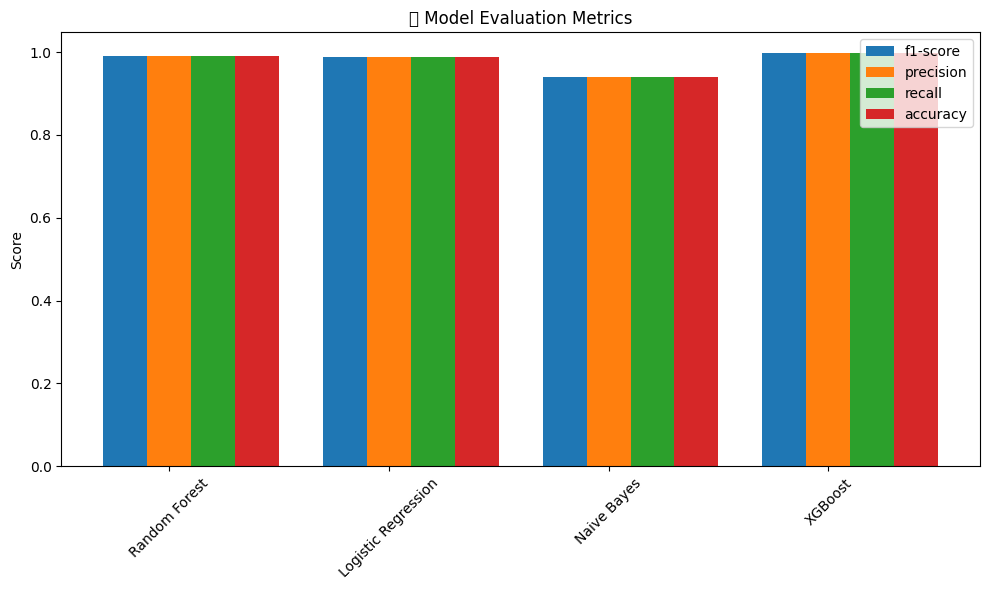

✅ All done! 🎉


In [14]:
# 📌 Step 4: Visualization

print("📈 Preparing model performance plot...\n")

metrics = ["f1-score", "precision", "recall", "accuracy"]
scores = {metric: [] for metric in metrics}
model_names = []

for name, report in results.items():
    model_names.append(name)
    scores["accuracy"].append(report["accuracy"])
    scores["f1-score"].append(report["weighted avg"]["f1-score"])
    scores["precision"].append(report["weighted avg"]["precision"])
    scores["recall"].append(report["weighted avg"]["recall"])

# Plot

fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(model_names))
width = 0.2

for i, metric in enumerate(metrics):
    ax.bar(x + i * width, scores[metric], width, label=metric)

ax.set_xticks(x + width)
ax.set_xticklabels(model_names, rotation=45)
ax.legend()
ax.set_title("📊 Model Evaluation Metrics")
ax.set_ylabel("Score")

plt.tight_layout()
plt.show()

print("✅ All done! 🎉")

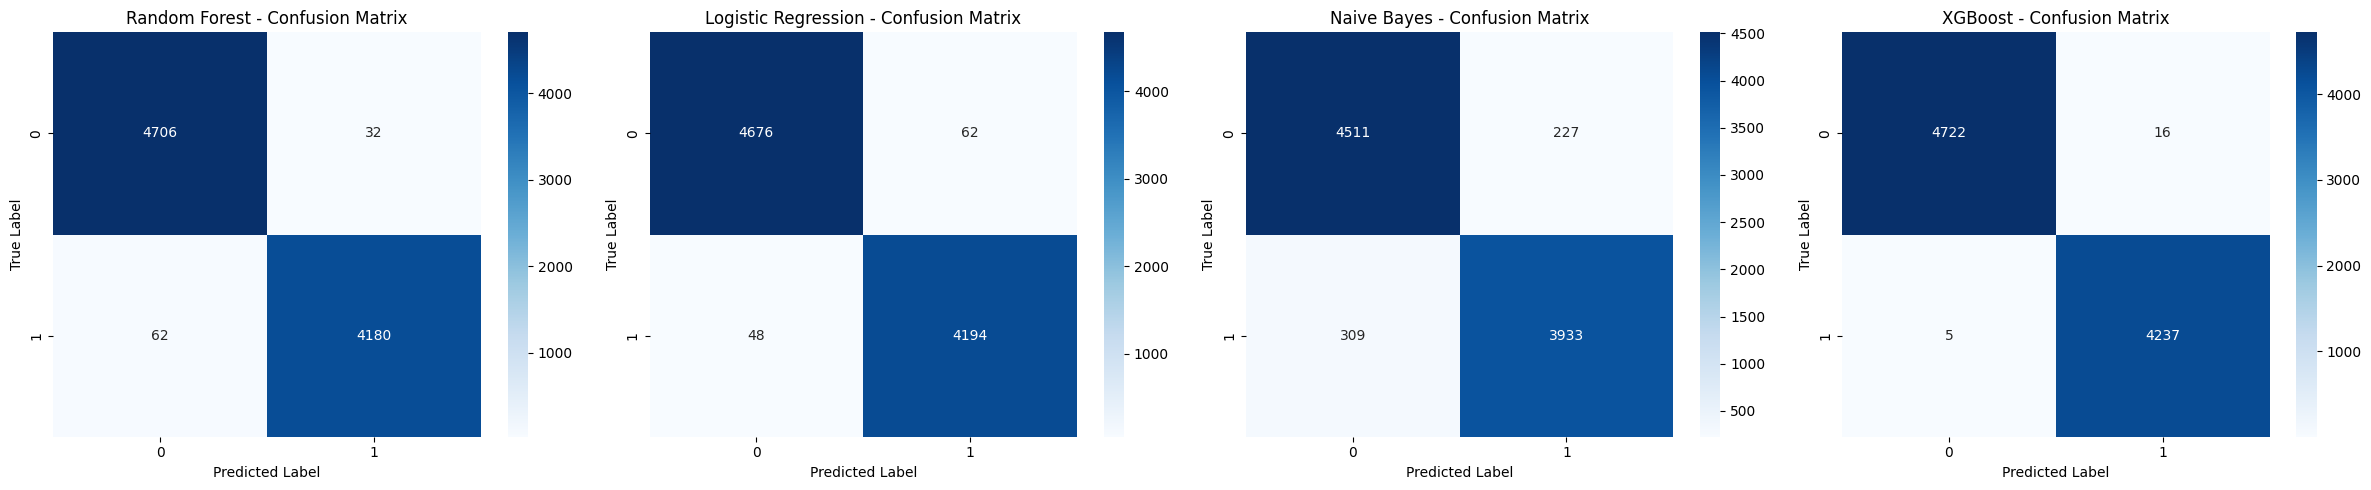

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get model names
model_names = list(models.keys())
n_models = len(model_names)

# Dynamically generate subplot layout
fig, axes = plt.subplots(1, n_models, figsize=(6 * n_models, 5))

# Ensure axes is iterable even if n_models = 1
if n_models == 1:
    axes = [axes]

# Plot confusion matrix for each model
for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(x_test_tfidf)
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f"{name} - Confusion Matrix")
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

plt.tight_layout()
plt.show()

In [18]:
best_model = max(results.items(), key=lambda x: x[1]['weighted avg']['f1-score'])[0]
print(f"🏆 Best model based on F1 Score: {best_model}")

🏆 Best model based on F1 Score: XGBoost


### Why XGBoost worked best ?

1. Effectively captures complex decision boundaries, even with sparse TF-IDF data.

2. Built-in regularization helps prevent overfitting.

3. Handles both balanced and imbalanced datasets well.

4. Achieved highest F1-score, indicating a solid balance between precision and recall.

5. Lower false positives and false negatives compared to other models.